# Real Estate Market Analysis With PySpark

### Group Members
#### Ifeoluwa Akinyele-Peter &nbsp;(Ife), &nbsp; Yuxuan Liu &nbsp;(Francis),&nbsp; Fung Sang Kety Tai &nbsp;(Kety)


### Introduction

- Our project focus: Data manipulating & Exploring Prediction Model - Can we predict the selling price of a property based on its characteristics?

- The dataset selected: "UK Property Price official data 1995-202304"
Kaggle:https://www.kaggle.com/datasets/lorentzyeung/price-paid-data-202304/data
    - Contains  over 28 million (28,276,228) entries and 16 variables


| Variable                          | Description                                                                                                     |
|:----------------------------------|:-----------------------------------------------------------------------------------------------------------------|
| Transaction_unique_identifier    | Unique identifier for property transactions.                                                                      |
| price                             | Sale price of the property, offering financial insight.                                                           |
| Date_of_Transfer                   | Date of property transaction for temporal analysis.                                                               |
| postcode                          | Property location postal code for geographical insights.                                                          |
| Property_Type                      | Type of property (detached, terrace, semi-detached, flat, or other) for property-specific analysis.                |
| Old/New                           | Indicates if the property is old or new.                                                                         |
| Duration                          | Ownership duration (freehold, leasehold, or unknown) for ownership structure insights.                            |
| PAON                              | Primary Addressable Object Name, typically the house number or name for detailed identification.                  |
| SAON                              | Secondary Addressable Object Name, providing additional details for properties with multiple units.              |
| Street                            | Street name where the property is located.                                                                       |
| Locality                          | Additional locality information for property surroundings.                                                       |
| Town/City                         | Town or city where the property is located.                                                                      |
| District                          | District within a town or city for localized area identification.                                                 |
| County                            | Specific county where the property is situated for regional context.                                              |
| PPDCategory_Type                  | Category type (usually A or B) indicating different property transaction classifications.                         |
| Record_Status - monthly_file_only | Record status (often denoted as A) representing the status of the record in the monthly file.                    |



#### Reasons for Dataset Selection

1. Large Volume of Data
2. Real-world Complexity
3. Data Preprocessing Skills Practicing & Predictive Modeling Opportunities



## Spark Code

### Import dataset from google drive directly & Read The File in PySpark

In [1]:
!pip install gdown
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=2a5fb90e5920c8da7541f07fb976e3536b3ef974bfca92a83f6e2cf55aeb42bc
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
import pyspark

from pyspark import SparkContext
sc = SparkContext.getOrCreate()

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark

In [3]:
import gdown
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, TimestampType
from pyspark.sql.functions import when, to_timestamp, year

# Google Drive file ID
file_id = '1UUSiSKiNUof2wjoX04v0tjtHFWnDXLeH' # We've used up two members google drive access;
#https://drive.google.com/file/d/1UUSiSKiNUof2wjoX04v0tjtHFWnDXLeH/view?usp=share_link

# Download the file from Google Drive
url = f'https://drive.google.com/uc?id={file_id}'
output = '202304 (1).csv'
gdown.download(url, output, quiet=False)

# Create Spark session
spark = SparkSession.builder.appName("UK_Housing").getOrCreate()

# Define the schema for the DataFrame
schema = StructType([
    StructField("Transaction_unique_identifier", StringType(), True),
    StructField("price", DoubleType(), True),
    StructField("Date_of_Transfer", TimestampType(), True),
    StructField("postcode", StringType(), True),
    StructField("Property_Type", StringType(), True),
    StructField("Old/New", StringType(), True),
    StructField("Duration", StringType(), True),
    StructField("PAON", StringType(), True),
    StructField("SAON", StringType(), True),
    StructField("Street", StringType(), True),
    StructField("Locality", StringType(), True),
    StructField("Town/City", StringType(), True),
    StructField("District", StringType(), True),
    StructField("County", StringType(), True),
    StructField("PPDCategory_Type", StringType(), True),
    StructField("Record_Status - monthly_file_only", StringType(), True),
])

# Read the CSV file with the specified schema and separator
df = spark.read.csv(output, header=False, schema=schema, sep=",")

# Rename the columns to match the specified names
colnames = ['Transaction_unique_identifier', 'Price', 'Date_of_Transfer',
            'postcode', 'Property_Type', 'Old/New',
            'Duration', 'PAON', 'SAON',
            'Street', 'Locality', 'Town/City',
            'District', 'County', 'PPDCategory_Type',
            'Record_Status - monthly_file_only'
            ]

df = df.toDF(*colnames)  # Rename the columns to match the specified names

# Convert "Date_of_Transfer" to a timestamp format
df = df.withColumn("Date_of_Transfer", to_timestamp(df["Date_of_Transfer"], "yyyy-MM-dd HH:mm"))

# Create a new column "Year" based on "Date_of_Transfer"
df = df.withColumn("Year", year("Date_of_Transfer"))

# Define the mapping for Property_Type
mapping = {
    'F': 'Flat',
    'T': 'Terrace',
    'D': 'Detached',
    'S': 'Semi-Detached',
    'O': 'Others'
}

# Update the Property_Type column using the mapping
for code, property_type in mapping.items():
    df = df.withColumn("Property_Type", when(df["Property_Type"] == code, property_type).otherwise(df["Property_Type"]))

# Show the updated DataFrame

#df.show(5)

# #references:
# # https://sparkbyexamples.com/pyspark/pyspark-structtype-and-structfield/?expand_article=1
# # https://sparkbyexamples.com/pyspark/pyspark-read-csv-file-into-dataframe/
# # https://github.com/wkentaro/gdown
# # https://safjan.com/download-data-google-drive-colab-gdown/
# # https://rockyshikoku.medium.com/i-want-to-download-google-drive-files-from-code-gdown-7bcf0a450962


Downloading...
From: https://drive.google.com/uc?id=1UUSiSKiNUof2wjoX04v0tjtHFWnDXLeH
To: /content/202304 (1).csv
100%|██████████| 4.94G/4.94G [00:39<00:00, 124MB/s]


### Dataset overview and preparation


#### Dataset overview

In [ ]:
df.printSchema()

root
 |-- Transaction_unique_identifier: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Date_of_Transfer: timestamp (nullable = true)
 |-- postcode: string (nullable = true)
 |-- Property_Type: string (nullable = true)
 |-- Old/New: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- PAON: string (nullable = true)
 |-- SAON: string (nullable = true)
 |-- Street: string (nullable = true)
 |-- Locality: string (nullable = true)
 |-- Town/City: string (nullable = true)
 |-- District: string (nullable = true)
 |-- County: string (nullable = true)
 |-- PPDCategory_Type: string (nullable = true)
 |-- Record_Status - monthly_file_only: string (nullable = true)
 |-- Year: integer (nullable = true)



In [ ]:
df.count()

28276228

In [ ]:
#Count unique values in each column
from pyspark.sql.functions import col, countDistinct

unique_counts_all = df.agg(*(countDistinct
(col(c)).alias(f"Unique_{c}") for c in df.columns))

unique_counts_all.show()

+------------------------------------+------------+-----------------------+---------------+--------------------+--------------+---------------+-----------+-----------+-------------+---------------+----------------+---------------+-------------+-----------------------+----------------------------------------+-----------+
|Unique_Transaction_unique_identifier|Unique_Price|Unique_Date_of_Transfer|Unique_postcode|Unique_Property_Type|Unique_Old/New|Unique_Duration|Unique_PAON|Unique_SAON|Unique_Street|Unique_Locality|Unique_Town/City|Unique_District|Unique_County|Unique_PPDCategory_Type|Unique_Record_Status - monthly_file_only|Unique_Year|
+------------------------------------+------------+-----------------------+---------------+--------------------+--------------+---------------+-----------+-----------+-------------+---------------+----------------+---------------+-------------+-----------------------+----------------------------------------+-----------+
|                            28276

#### Missing **values**

In [ ]:
# Counting missing and null values in each column
from pyspark.sql.functions import col, count, when, isnan

missing_values = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])


missing_values.show()


+-----------------------------+-----+----------------+--------+-------------+-------+--------+----+--------+------+--------+---------+--------+------+----------------+---------------------------------+
|Transaction_unique_identifier|Price|Date_of_Transfer|postcode|Property_Type|Old/New|Duration|PAON|    SAON|Street|Locality|Town/City|District|County|PPDCategory_Type|Record_Status - monthly_file_only|
+-----------------------------+-----+----------------+--------+-------------+-------+--------+----+--------+------+--------+---------+--------+------+----------------+---------------------------------+
|                            0|    0|               0|   45969|            0|      0|       0|4189|24950368|447756|10085851|        0|       0|     0|               0|                                0|
+-----------------------------+-----+----------------+--------+-------------+-------+--------+----+--------+------+--------+---------+--------+------+----------------+-------------------------

#### Summary for Price

In [ ]:
# Calculate median, mean, min, max of the 'price' column
from pyspark.sql import functions as F
statistics_df = df.agg(
    F.expr('percentile_approx(price, 0.5)').alias('median'),
    F.mean('price').alias('mean'),
    F.min('price').alias('min'),
    F.max('price').alias('max')
)

statistics_df.show()

+--------+------------------+---+-------+
|  median|              mean|min|    max|
+--------+------------------+---+-------+
|149950.0|218130.49009903302|1.0|5.943E8|
+--------+------------------+---+-------+



#### Outliers Detection & Handling for Price

In [ ]:
from pyspark.sql.functions import col, mean, stddev, lit

# Calculate mean and standard deviation
stats = df.select(mean(col('price')).alias('mean'), stddev(col('price')).alias('std')).collect()
mean_price = stats[0]['mean']
std_price = stats[0]['std']

# Set the threshold for outliers
threshold = 3

# Filter outliers
outliers = df.filter((col('price') > (mean_price + threshold * std_price)) | (col('price') < (mean_price - threshold * std_price)))

# Show the outliers
outliers.show(5)

# Show the total count of outliers
total_outliers_count = outliers.count()
print(f'Total count of outliers in price: {total_outliers_count}')


+-----------------------------+---------+----------------+--------+-------------+-------+--------+--------------+----+--------------------+--------+-----------+--------------------+--------------+----------------+---------------------------------+
|Transaction_unique_identifier|    price|Date_of_Transfer|postcode|Property_Type|Old/New|Duration|          PAON|SAON|              Street|Locality|  Town/City|            District|        County|PPDCategory_Type|Record_Status - monthly_file_only|
+-----------------------------+---------+----------------+--------+-------------+-------+--------+--------------+----+--------------------+--------+-----------+--------------------+--------------+----------------+---------------------------------+
|         {71A16873-2ABB-45...|5610000.0|1995-01-09 00:00|KT22 7DE|         Flat|      N|       F|THORNETS HOUSE|NULL|     BUILDER GARDENS|    NULL|LEATHERHEAD|         MOLE VALLEY|        SURREY|               A|                                A|
|       

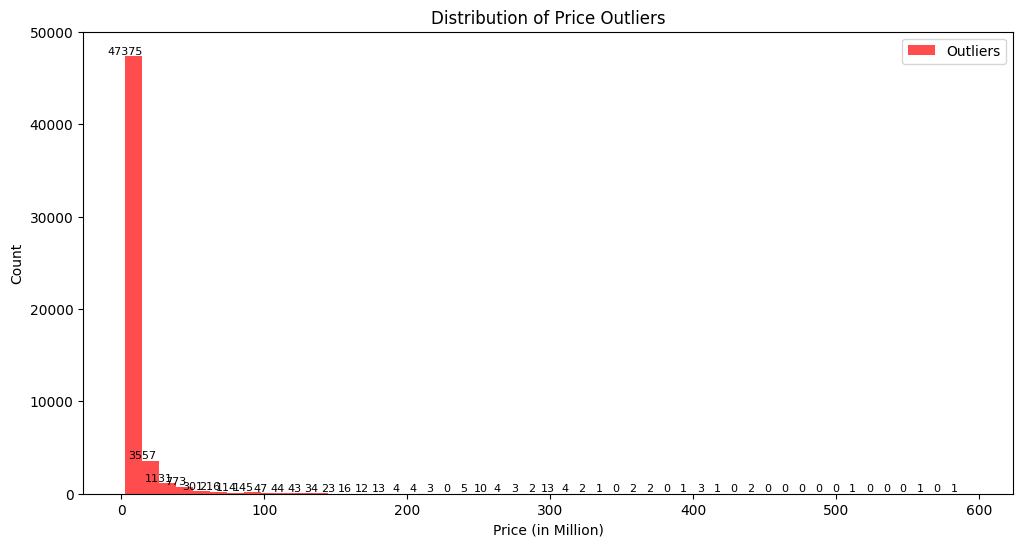

In [ ]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas for plotting outliers
outliers_pd = outliers.select("price").toPandas()

# Convert prices to million
outliers_pd["price_M"] = outliers_pd["price"] / 1e6

# Create a histogram with outliers highlighted
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(outliers_pd["price_M"], bins=50, color='red', label='Outliers', alpha=0.7)
plt.title("Distribution of Price Outliers")
plt.xlabel("Price (in Million)")
plt.ylabel("Count")
plt.legend()

# Set y-axis limits
plt.ylim(0, 50000)

# Annotate each bin with its count
for count, bin_val in zip(n, bins):
    plt.text(bin_val, count, str(int(count)), ha='center', va='bottom', fontsize=8)

plt.show()


### Dashboard Attempt

In [5]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 27.9 MB/s eta 0:00:00


In [6]:
# working year sidebar & 4 plots
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
from pyspark.sql.functions import year
import pyspark.sql.functions as F

# Plot 1: Average Price Over Time
price_over_time = df.groupBy(year('Date_of_Transfer').alias('Year')).avg('price').sort('Year').toPandas()
fig1 = px.line(price_over_time, x='Year', y='avg(price)', labels={'avg(price)': 'Average Price'})
fig1.update_layout(title='Average Property Price Over Time')

# Plot 2: Temporal Trends in Property Transactions
df_temporal = df.withColumn("Year", F.year("Date_of_Transfer"))
transactions_by_year = df_temporal.groupBy("Year").agg(F.count("Transaction_unique_identifier").alias("num_transactions"))
transactions_by_year_pandas = transactions_by_year.toPandas()
fig2 = px.line(transactions_by_year_pandas, x='Year', y='num_transactions', labels={'num_transactions': 'Number of Transactions'})
fig2.update_layout(title='Temporal Trends in Property Transactions')

# Plot 3: Correlation between Property Price and Property Type
correlation_df = df.groupBy("Property_Type").agg(F.avg("price").alias("avg_price"))
correlation_pandas = correlation_df.toPandas()
fig3 = px.bar(correlation_pandas, x='avg_price', y='Property_Type', orientation='h',
              labels={'avg_price': 'Average Price', 'Property_Type': 'Property Type'},
              title='Correlation between Property Price and Property Type')

# Plot 4: Pie Chart of Property Types
# Calculate filtered_property_type_counts here
filtered_property_type_counts = df.groupBy('Property_Type').count().collect()
filtered_property_type_counts_df = spark.createDataFrame(filtered_property_type_counts).toPandas()
fig4 = px.pie(filtered_property_type_counts_df, names='Property_Type', values='count',
              title='Pie Chart of Property Types',
              labels={'count': 'Count', 'Property_Type': 'Property Type'},
              hole=0.3)

# Creating the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    # Sidebar with filters
    html.Div([
        html.Label('Filter by Year:', style={'font-size': '18px', 'font-weight': 'bold'}),
        dcc.RangeSlider(
            id='year-slider',
            min=price_over_time['Year'].min(),
            max=price_over_time['Year'].max(),
            step=1,
            marks={str(year): str(year) for year in range(price_over_time['Year'].min(), price_over_time['Year'].max() + 1, 8)},
            value=[price_over_time['Year'].min(), price_over_time['Year'].max()]
        ),
    ], style={'width': '20%', 'display': 'inline-block', 'margin-right': '10px'}),

    html.Div([
        html.H1("Property Market Analysis Dashboard", style={'font-size': '32px', 'font-weight': 'bold'}),

        # Plot 1: Average Price Over Time
        dcc.Graph(id='average-price-over-time', figure=fig1),

        # Plot 2: Temporal Trends in Property Transactions
        dcc.Graph(id='temporal-trends', figure=fig2),

        # Plot 3: Correlation between Property Price and Property Type
        dcc.Graph(id='correlation-plot', figure=fig3, style={'width': '50%', 'float': 'left', 'display': 'inline-block'}),

        # Plot 4: Pie Chart of Property Types
        dcc.Graph(id='property-type-pie', figure=fig4, style={'width': '50%', 'float': 'left', 'display': 'inline-block'}),
    ]),
])

# Callback to update plots based on the selected year range, counties, and property types
@app.callback(
    [Output('average-price-over-time', 'figure'),
     Output('temporal-trends', 'figure'),
     Output('correlation-plot', 'figure'),
     Output('property-type-pie', 'figure')],
    [Input('year-slider', 'value')]
)
def update_plots(selected_years):
    # Convert selected_years to integers
    selected_years = list(map(int, selected_years))

    # Filter data based on selected years
    filtered_price_over_time = price_over_time[
        (price_over_time['Year'] >= selected_years[0]) & (price_over_time['Year'] <= selected_years[1])
    ]

    filtered_transactions_by_year = transactions_by_year_pandas[
        (transactions_by_year_pandas['Year'] >= selected_years[0]) & (transactions_by_year_pandas['Year'] <= selected_years[1])
    ]

    # Update Plot 1
    updated_fig1 = px.line(filtered_price_over_time, x='Year', y='avg(price)', labels={'avg(price)': 'Average Price'})
    updated_fig1.update_layout(title='Average Property Price Over Time')

    # Update Plot 2
    updated_fig2 = px.line(filtered_transactions_by_year, x='Year', y='num_transactions', labels={'num_transactions': 'Number of Transactions'})
    updated_fig2.update_layout(title='Temporal Trends in Property Transactions')

    # Update Plot 3
    updated_fig3 = px.bar(correlation_pandas, x='avg_price', y='Property_Type', orientation='h',
                          labels={'avg_price': 'Average Price', 'Property_Type': 'Property Type'},
                          title='Correlation: Average Price and Property Type')

    # Calculate filtered_property_type_counts here
    filtered_property_type_counts = df.groupBy('Property_Type').count().collect()
    filtered_property_type_counts_df = spark.createDataFrame(filtered_property_type_counts).toPandas()

    # Update Plot 4
    updated_fig4 = px.pie(filtered_property_type_counts_df, names='Property_Type', values='count',
                          title='Pie Chart of Property Types',
                          labels={'count': 'Count', 'Property_Type': 'Property Type'},
                          hole=0.3)

    return updated_fig1, updated_fig2, updated_fig3, updated_fig4


# Run the local server
if __name__ == '__main__':
    app.run_server(debug=True)


#Reference: https://youtu.be/pGMvvq7R1IM?si=jlXXASTnCEUir6tW
#https://youtu.be/hSPmj7mK6ng?si=HIcIDVPDcQNCDjKD
#https://youtube.com/playlist?list=PLH6mU1kedUy8fCzkTTJlwsf2EnV_UvOV-&si=vDSzLBX7_1gxaFmb
#https://youtu.be/UYGwgHhazMA?si=sqF8455GGF_xOitL


<IPython.core.display.Javascript object>

### Prediction Model Attempt (Regression)

#### Linear regression using Log_Price

Model 1: with  ["County", "District", "Property_Type"]

Model 2: with ["County", "District", "Property_Type", "Date_of_Transfer"]

In [ ]:
from pyspark.sql.functions import col, log

#Apply the log transformation to the 'price' column since the price is right-skewed;
df = df.withColumn("log_price", log(col("price")))

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Perform StringIndexing on categorical columns
indexers = [StringIndexer(inputCol=column, outputCol=f"{column}_index").fit(df) for column in ["County", "District", "Property_Type"]]

# One-hot encode the indexed categorical columns
encoders = [OneHotEncoder(inputCol=f"{column}_index", outputCol=f"{column}_encoded") for column in ["County", "District", "Property_Type"]]

# Assemble all features into a single vector
assembler = VectorAssembler(inputCols=["County_encoded", "District_encoded", "Property_Type_encoded"], outputCol="features")

# Model building
regressor = LinearRegression(featuresCol='features', labelCol='log_price')  # the target variable, 'price'

# Pipeline stages
stages = indexers + encoders + [assembler, regressor]

#solver='sgd' invalid, "LinearRegression_ffb3bb8c9a9b parameter solver given invalid value sgd."

# Create a pipeline
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=stages)

# Split the data into training and testing sets
df_train, df_test = df.randomSplit([0.75, 0.25])

# Fit the model on the training data
model = pipeline.fit(df_train)

# Make predictions on the training data
train_predictions = model.transform(df_train)

# Make predictions on the test data
test_predictions = model.transform(df_test)

# Evaluate the model on training data
train_evaluator = RegressionEvaluator(labelCol='log_price', predictionCol='prediction', metricName='rmse')
train_rmse = train_evaluator.evaluate(train_predictions)
train_r2 = train_evaluator.evaluate(train_predictions, {train_evaluator.metricName: 'r2'})

print(f'Training - Root Mean Squared Error (RMSE): {train_rmse}')
print(f'Training - R-squared (R2): {train_r2}')

# Evaluate the model on testing data
test_evaluator = RegressionEvaluator(labelCol='log_price', predictionCol='prediction', metricName='rmse')
test_rmse = test_evaluator.evaluate(test_predictions)
test_r2 = test_evaluator.evaluate(test_predictions, {test_evaluator.metricName: 'r2'})

print(f'Testing - Root Mean Squared Error (RMSE): {test_rmse}')
print(f'Testing - R-squared (R2): {test_r2}')

#RMSE lower the better

# If Using price not log_price, results are:
# Training - Root Mean Squared Error (RMSE): 842969.6034398014
# Training - R-squared (R2): 0.048671254468623304

# Testing - Root Mean Squared Error (RMSE): 861806.6726390235
# Testing - R-squared (R2): 0.04627886158735073


23/12/14 19:33:20 WARN Instrumentation: [60fb9234] regParam is zero, which might cause numerical instability and overfitting.
Java HotSpot(TM) 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
Java HotSpot(TM) 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=


CodeCache: size=131072Kb used=34587Kb max_used=35316Kb free=96484Kb
 bounds [0x00000001061a8000, 0x00000001084a8000, 0x000000010e1a8000]
 total_blobs=13305 nmethods=12291 adapters=926
 compilation: disabled (not enough contiguous free space left)


23/12/14 19:34:13 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/12/14 19:35:34 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK
23/12/14 19:35:34 WARN Instrumentation: [60fb9234] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


Training - Root Mean Squared Error (RMSE): 0.6846261299389715
Training - R-squared (R2): 0.3418214866148984


Testing - Root Mean Squared Error (RMSE): 0.6848736078908225
Testing - R-squared (R2): 0.34226030773793736


In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col, unix_timestamp
from pyspark.sql.types import StringType

# Convert the "Date_of_Transfer" column to a string
df = df.withColumn("Date_of_Transfer_str", col("Date_of_Transfer").cast(StringType()))

# Perform StringIndexing on categorical columns
categorical_columns = ["County", "District", "Property_Type"]
indexers = [StringIndexer(inputCol=column, outputCol=f"{column}_index").fit(df) for column in categorical_columns]

# One-hot encode the indexed categorical columns
encoders = [OneHotEncoder(inputCol=f"{column}_index", outputCol=f"{column}_encoded") for column in categorical_columns]

# Perform StringIndexing on the "Date_of_Transfer_str" column
date_indexer = StringIndexer(inputCol="Date_of_Transfer_str", outputCol="Date_index").fit(df)

# Assemble all features into a single vector
assembler = VectorAssembler(inputCols=["County_encoded", "District_encoded", "Property_Type_encoded", "Date_index"], outputCol="features")

# Model building
regressor = LinearRegression(featuresCol='features', labelCol='log_price')  # the target variable, 'log_price'

# Pipeline stages
stages = indexers + encoders + [date_indexer, assembler, regressor]

# Create a pipeline
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=stages)

# Split the data into training and testing sets
df_train, df_test = df.randomSplit([0.75, 0.25])

# Fit the model on the training data
model = pipeline.fit(df_train)

# Make predictions on the training data
train_predictions = model.transform(df_train)

# Make predictions on the test data
test_predictions = model.transform(df_test)

# Evaluate the model on training data
train_evaluator = RegressionEvaluator(labelCol='log_price', predictionCol='prediction', metricName='rmse')
train_rmse = train_evaluator.evaluate(train_predictions)
train_r2 = train_evaluator.evaluate(train_predictions, {train_evaluator.metricName: 'r2'})

print(f'Training - Root Mean Squared Error (RMSE): {train_rmse}')
print(f'Training - R-squared (R2): {train_r2}')

# Evaluate the model on testing data
test_evaluator = RegressionEvaluator(labelCol='log_price', predictionCol='prediction', metricName='rmse')
test_rmse = test_evaluator.evaluate(test_predictions)
test_r2 = test_evaluator.evaluate(test_predictions, {test_evaluator.metricName: 'r2'})

print(f'Testing - Root Mean Squared Error (RMSE): {test_rmse}')
print(f'Testing - R-squared (R2): {test_r2}')

# Drop the temporary column
df = df.drop("Date_of_Transfer_str")

#RMSE lower the better

# If Using price not log_price, results are:
# Training - Root Mean Squared Error (RMSE): 868500.6189465981
# Training - R-squared (R2): 0.046226447923813474

# Testing - Root Mean Squared Error (RMSE): 782011.5693034574
# Testing - R-squared (R2): 0.054894329314510326


23/12/14 20:14:32 WARN Instrumentation: [4bbad420] regParam is zero, which might cause numerical instability and overfitting.
23/12/14 20:16:37 WARN Instrumentation: [4bbad420] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


Training - Root Mean Squared Error (RMSE): 0.6845131111017757
Training - R-squared (R2): 0.34215752743971906


Testing - Root Mean Squared Error (RMSE): 0.6845266256430099
Testing - R-squared (R2): 0.34257116385543074


In [4]:
# Random forest model; takes 37 mins to run;

from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.regression import RandomForestRegressor, DecisionTreeRegressor
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

# Select relevant columns
columns = ["Property_Type", "Old/New", "District", "County"]

# StringIndexer to convert string features to numerical indices
indexers = [StringIndexer(inputCol=columns, outputCol=columns+"_index").fit(df) for columns in ["Property_Type", "Old/New", "District", "County"]]

# VectorAssembler to create feature vector
feature_cols = ["Property_Type_index", "Old/New_index", "District_index", "County_index"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Define the RandomForestRegressor
rf = RandomForestRegressor(featuresCol="features", labelCol="Price", maxBins=467)

# Create a pipeline
pipeline = Pipeline(stages=indexers + [assembler, rf])

# Split the data into training and test sets
(train_data, test_data) = df.randomSplit([0.8, 0.2], seed=42)

# Train the model
model = pipeline.fit(train_data)

# Make predictions on the test data
prediction = model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")

# Display predictions
prediction.select("Property_Type", "Old/New", "District", "County", "prediction").show()

#  RMSE is 8365432.

Root Mean Squared Error (RMSE) on test data: 863009.9283936424
+-------------+-------+--------------------+----------------+------------------+
|Property_Type|Old/New|            District|          County|        prediction|
+-------------+-------+--------------------+----------------+------------------+
|     Detached|      N|          WINCHESTER|       HAMPSHIRE| 399589.1284692605|
|      Terrace|      N|          WANDSWORTH|  GREATER LONDON|417637.20743824006|
|      Terrace|      N|               DERBY|      DERBYSHIRE|100180.71453189298|
|     Detached|      N|         BOURNEMOUTH|     BOURNEMOUTH|  219088.079813948|
|      Terrace|      Y|              WOKING|          SURREY| 277797.5259563302|
|Semi-Detached|      N|             GEDLING| NOTTINGHAMSHIRE|123015.90047981434|
|         Flat|      N|         BOURNEMOUTH|     BOURNEMOUTH|145558.64339771256|
|Semi-Detached|      N|               LUTON|           LUTON| 136022.9754639831|
|      Terrace|      N|            TAMWORTH|  

### Conclusion and recommendations based on the analysis:


In [ ]:
# Conclusion and Recommendations


# mac users face a lot challenges,
# so a windows PC would be a better recommendation so we can use cloudera for data pre-processing instead of google colab
# Colab has an issue with automatically saving changes

#consider removing the outliers,
#or divide price into groups based on domain knowledge of the UK property market to run classification model.